# California Housing Price Prediction (Regression)

In this project I build a simple regression model in Python to predict median house values
in California districts using the built-in California housing dataset from scikit-learn.
This demonstrates a full pipeline: loading data, preparing features, training a regression
model, and evaluating its performance.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Load the built-in California housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # pandas DataFrame with features + target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.columns


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X.shape, y.shape


((20640, 8), (20640,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((16512, 8), (4128, 8))

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.5558915986952442
Mean Absolute Error (MAE): 0.5332001304956565
R-squared (R2): 0.575787706032451


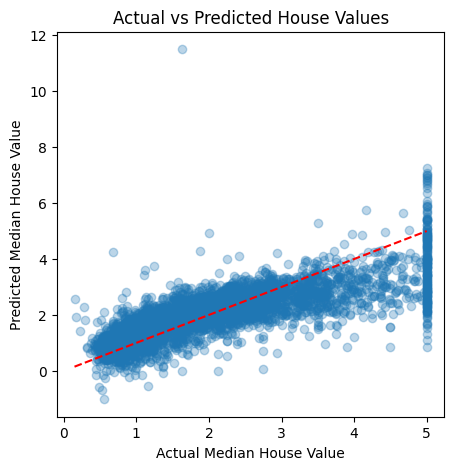

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## Summary

In this notebook I built a simple regression model on the built-in California housing dataset from scikit-learn.

Steps:
- Loaded the California housing dataset and explored its columns.
- Separated the numerical features as inputs and the median house value as the target.
- Split the data into training and test sets and standardised the features.
- Trained a linear regression model.
- Evaluated the model using mean squared error (MSE), mean absolute error (MAE), R-squared, and a scatter plot of actual vs predicted values.

This demonstrates that I can:
- Work with numerical tabular data in Python
- Build and evaluate a basic regression model using scikit-learn
- Interpret common regression metrics (MSE, MAE, R-squared)
